In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
data = pd.read_csv('/content/sample_data/pe_section_headers.csv')

# Check the first few rows of the dataset
print(data.head())

# Preprocess the data
X = data[['size_of_data', 'virtual_address', 'entropy', 'virtual_size']]
y = data['malware']  # Assuming 'malware' is the target variable with binary values (0 for safe, 1 for ransomware)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

# Evaluate the model
print(classification_report(y_test, y_test_pred))
conf_matrix = confusion_matrix(y_test, y_test_pred)


                               hash  size_of_data  virtual_address   entropy  \
0  071e8c3f8922e186e57548cd4c703a5d        443392             4096  6.529624   
1  33f8e6d08a6aae939f25a8e0d63dd523        331264             4096  6.604314   
2  b68abd064e975e1c6d5f25e748663076         74240             4096  6.046789   
3  72049be7bd30ea61297ea624ae198067        219648             4096  6.497018   
4  c9b3700a77facf29172f32df6bc77f48        262144             4096  6.638142   

   virtual_size  malware  
0        442984        1  
1        330784        1  
2         73819        1  
3        219524        1  
4        261943        1  
Training Accuracy: 1.00
Test Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.66      0.42      0.51       354
           1       0.98      0.99      0.98      8305

    accuracy                           0.97      8659
   macro avg       0.82      0.70      0.75      8659
weighted avg       0.96      0.97      0.

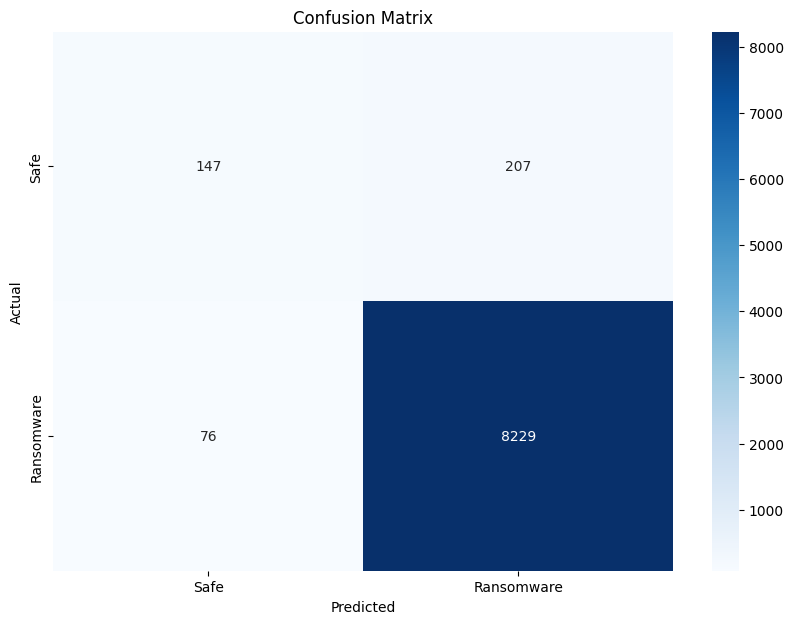

In [3]:
# Visualization of the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Ransomware'], yticklabels=['Safe', 'Ransomware'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


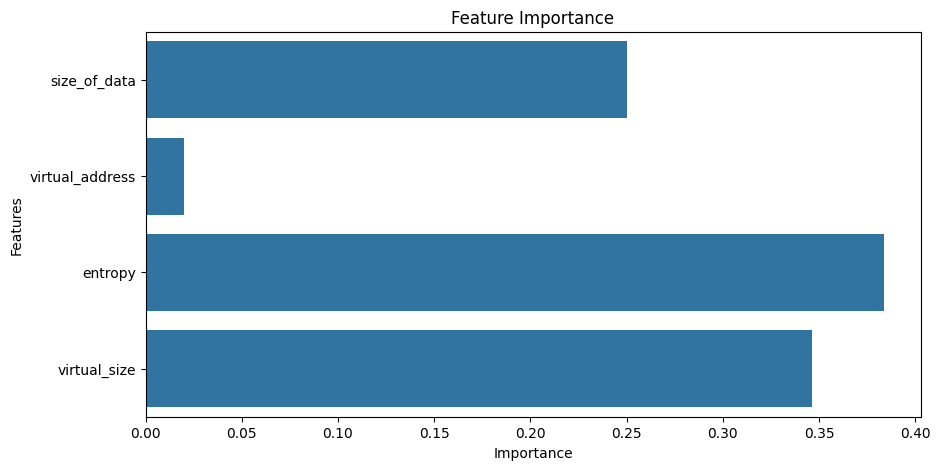

In [5]:
# Feature importance visualization
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<ipython-input-6-0710636f4b75>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


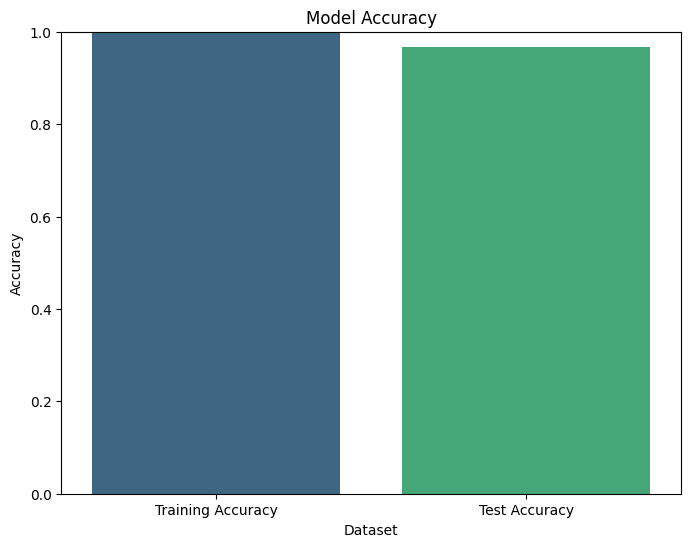

In [6]:
# Plotting accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.show()
